In [1]:
# 1. Importing libraries and data
# 2. Data cleaning
# 3. Data prep for regression analysis
# 4. Regression analysis
# Bonus: performance improvement after removing outliers

In [60]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [76]:
path = r'C:\Users\rekha\OneDrive\Documents\Billionaires Data'

In [77]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'billionaires_data_maps.csv'), index_col = False)

## Data Cleaning

In [78]:
df.describe()

,Unnamed: 0,FinalWorth,Age,Birth Year,Birth Month,Birthday,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires
count,2639.000000,2639.000000,2574.000000,2563.000000,2563.000000,2563.000000,2456.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000,2601.000000
mean,1319.000000,4614.361501,65.128594,1957.194694,5.742099,12.093250,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156,1.001538
std,761.958004,9824.168449,13.247596,13.272586,3.709627,9.915189,26.452951,3.623763,9.575588e+12,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989,0.039193
min,0.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,1.000000
25%,659.500000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891,1.000000
50%,1319.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526,1.000000
75%,1978.500000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397,1.000000
max,2638.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,2.000000


In [79]:
df.columns

Index(['Unnamed: 0', 'FinalWorth', 'Person Name', 'Age', 'country', 'City',
       'source', 'Industries', 'Country_Of_Citizenship', 'Self_Made', 'Status',
       'Gender', 'State', 'Residence_State_Region', 'Birth Year',
       'Birth Month', 'Birthday', 'CPI Country', 'CPI ChangeCountry',
       'GDP_Country', 'Gross_Tertiarye_Education_Enrollment',
       'Gross_Primary_Education_Enrollment_Country', 'Life_Expectancy_Country',
       'Tax_Revenue_Country', 'Total_TaxRate_Country', 'Population_Country',
       'Latitude Country', 'Longitude Country', 'Population_Category',
       'Number of Billionaires'],
      dtype='object')

In [80]:
df.head(20)

,Unnamed: 0,FinalWorth,Person Name,Age,country,City,source,Industries,Country_Of_Citizenship,Self_Made,...,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Population_Category,Number of Billionaires
0,0,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,False,...,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,50M-100M,1.0
1,1,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
2,2,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
3,3,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
4,4,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
5,5,104000,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
6,6,94500,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0
7,7,93000,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,True,...,40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784,100M-500M,1.0
8,8,83400,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,False,...,28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880,>500M,1.0
9,9,80700,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,100M-500M,1.0


The Data is already cleaned in the previous ecercise and now i only want to drop one column which is not required for analysis.

In [81]:
# Check for missing values
    
df.isnull().sum()

Unnamed: 0                                       0
FinalWorth                                       0
Person Name                                      0
Age                                             65
country                                         38
City                                            72
source                                           0
Industries                                       0
Country_Of_Citizenship                           0
Self_Made                                        0
Status                                           0
Gender                                           0
State                                         1886
Residence_State_Region                        1892
Birth Year                                      76
Birth Month                                     76
Birthday                                        76
CPI Country                                    183
CPI ChangeCountry                              183
GDP_Country                    

In [82]:
df['Age'].fillna(65, inplace=True)

In [101]:
df['Life_Expectancy_Country'].fillna(78, inplace=True)

In [102]:
df.isnull().sum()

Unnamed: 0                                       0
FinalWorth                                       0
Person Name                                      0
Age                                              0
country                                         38
City                                            72
source                                           0
Industries                                       0
Country_Of_Citizenship                           0
Self_Made                                        0
Status                                           0
Gender                                           0
State                                         1886
Residence_State_Region                        1892
Birth Year                                      76
Birth Month                                     76
Birthday                                        76
CPI Country                                    183
CPI ChangeCountry                              183
GDP_Country                    

In [103]:
df.dtypes

Unnamed: 0                                      int64
FinalWorth                                      int64
Person Name                                    object
Age                                           float64
country                                        object
City                                           object
source                                         object
Industries                                     object
Country_Of_Citizenship                         object
Self_Made                                        bool
Status                                         object
Gender                                         object
State                                          object
Residence_State_Region                         object
Birth Year                                    float64
Birth Month                                   float64
Birthday                                      float64
CPI Country                                   float64
CPI ChangeCountry           

In [104]:
df['Life_Expectancy_Country'] = df['Life_Expectancy_Country'].astype('float64')

In [105]:
df.head(100)

,Unnamed: 0,FinalWorth,Person Name,Age,country,City,source,Industries,Country_Of_Citizenship,Self_Made,...,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Population_Category,Number of Billionaires
0,0,211000,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,False,...,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,50M-100M,1.0
1,1,180000,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
2,2,114000,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
3,3,107000,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
4,4,106000,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,17400,Donald Bren,90.0,United States,Newport Beach,Real estate,Real Estate,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
96,96,17400,"John Menard, Jr.",83.0,United States,Eau Claire,Home improvement stores,Fashion & Retail,United States,True,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
97,97,17100,Rupert Murdoch & family,92.0,United States,New York,"Newspapers, TV network",Media & Entertainment,United States,False,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,100M-500M,1.0
98,98,16700,Vicky Safra & family,70.0,Switzerland,Crans-Montana,Banking,Finance & Investments,Brazil,False,...,59.6,105.2,83.6,10.1,28.8,8574832.0,46.818188,8.227512,5M-10M,1.0


In [106]:
df.describe()

,Unnamed: 0,FinalWorth,Age,Birth Year,Birth Month,Birthday,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires
count,2639.000000,2639.000000,2639.000000,2563.000000,2563.000000,2563.000000,2456.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2639.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000,2601.000000
mean,1319.000000,4614.361501,65.125426,1957.194694,5.742099,12.093250,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.114399,12.546235,43.963344,5.102053e+08,34.903592,12.583156,1.001538
std,761.958004,9824.168449,13.083384,13.272586,3.709627,9.915189,26.452951,3.623763,9.575588e+12,21.343426,4.710977,3.599993,5.368625,12.145296,5.542447e+08,17.003497,86.762989,0.039193
min,0.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,1.000000
25%,659.500000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891,1.000000
50%,1319.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526,1.000000
75%,1978.500000,4200.000000,74.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397,1.000000
max,2638.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,2.000000


In [ ]:
df.head()

C:\Users\rekha\AppData\Local\Temp\ipykernel_7420\1490253100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life_Expectancy_Country'], bins=25)
C:\Users\rekha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life_Expectancy_Country', ylabel='Density'>

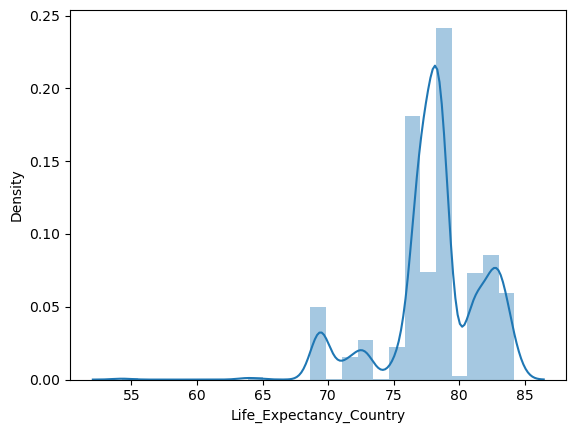

In [95]:
# Shows extreme values

sns.distplot(df['Life_Expectancy_Country'], bins=25)


Some of the outliers in the high values may need to be removed, but let's try without doing so first

In [107]:
# Check the mean

df['Life_Expectancy_Country'].mean() 

78.11439939370973

In [108]:
# Check the median

df['Life_Expectancy_Country'].median()

78.5

In [109]:
 # Check the max
    
df['Life_Expectancy_Country'].max()

84.2

#### 3. Data prep for regression analysis

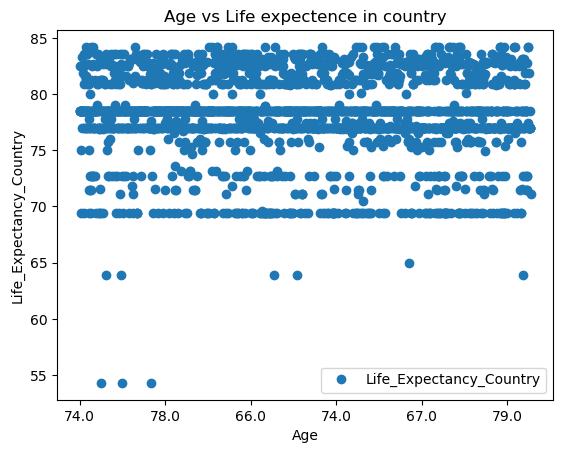

In [54]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

# The style option creates a scatterplot; without it, we only have lines.

df.plot(x = 'Age', y='Life_Expectancy_Country',style='o') 
plt.title('Age vs Life expectence in country')  
plt.xlabel('Age')  
plt.ylabel('Life_Expectancy_Country')
plt.show()

In [110]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Age'].values.reshape(-1,1)
y = df['Life_Expectancy_Country'].values.reshape(-1,1)

In [111]:
X

array([[74.],
       [51.],
       [59.],
       ...,
       [60.],
       [71.],
       [66.]])

In [112]:
y

array([[82.5],
       [78.5],
       [78.5],
       ...,
       [77. ],
       [77. ],
       [71.1]])

In [113]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis


In [115]:
# Create a regression object.

# This is the regression object, which will be fit onto the training set

regression = LinearRegression()  

In [116]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [117]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

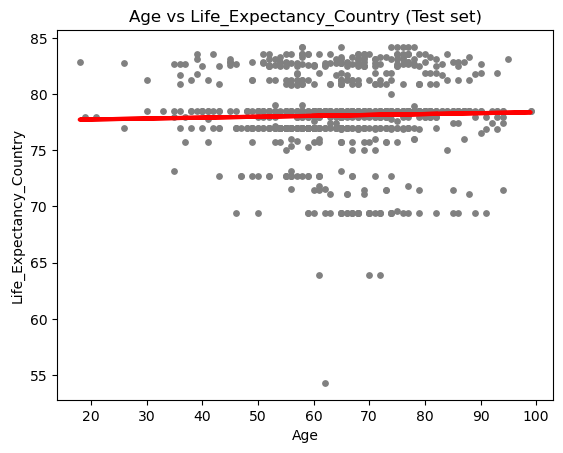

In [119]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Life_Expectancy_Country (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Life_Expectancy_Country')
plot_test.show()

In [122]:
# Create objects that contain the model summary statistics.

# This is the mean squared error

rmse = mean_squared_error(y_test, y_predicted) 

# This is the R2 score

r2 = r2_score(y_test, y_predicted)

In [123]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00800707]]
Mean squared error:  13.236016732924321
R2 score:  -0.001145219271088349


as per this regression line i think the variables having positive  to 0 coefficient that is X and y remains same.and i can say this regression having accuracy to no accuracy as many data points are away from the line even it connects some of them abd the r2 values closer to 0 indicate a poor fit.

In [124]:
y_predicted

array([[78.24395001],
       [78.16387928],
       [77.87562465],
       [78.09181562],
       [77.90765294],
       [78.0677944 ],
       [78.10782977],
       [78.02775904],
       [78.10782977],
       [78.21192172],
       [78.23594294],
       [78.02775904],
       [78.02775904],
       [78.08380855],
       [77.89964587],
       [77.9797166 ],
       [78.07580148],
       [78.20391464],
       [78.07580148],
       [78.04377318],
       [78.0677944 ],
       [78.10782977],
       [78.28398538],
       [78.26797123],
       [78.20391464],
       [78.1879005 ],
       [77.90765294],
       [78.33202781],
       [78.16387928],
       [78.13185099],
       [78.11583684],
       [78.20391464],
       [78.0677944 ],
       [77.89163879],
       [77.93167416],
       [78.03576611],
       [78.16387928],
       [78.0677944 ],
       [78.28398538],
       [78.0677944 ],
       [78.05178026],
       [77.88363172],
       [78.20391464],
       [78.02775904],
       [78.05978733],
       [77

In [125]:
# Create a dataframe comparing the actual and predicted values of y.
    
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,69.4,78.243950
1,69.4,78.163879
2,77.0,77.875625
3,80.9,78.091816
4,82.5,77.907653
5,77.0,78.067794
6,81.9,78.107830
7,77.0,78.027759
8,78.5,78.107830
9,77.0,78.211922


In [ ]:
## Compare how the regression fits the training set

In [127]:
# Predict.
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [128]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [129]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00800707]]
Mean squared error:  12.829942243319746
R2 score:  0.0008582991240639881


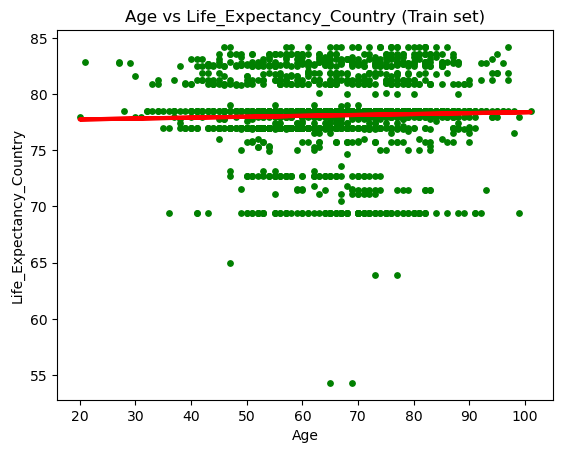

In [131]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Life_Expectancy_Country (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Life_Expectancy_Country')
plot_test.show()

In [ ]:
# Bonus: performance improvement after removing outliers

In [132]:
# Clean the extreme values from the \"Life_Expectancy_Country\" variable observed during the consistency checks.

df_test = df[df['Life_Expectancy_Country'] <=100]

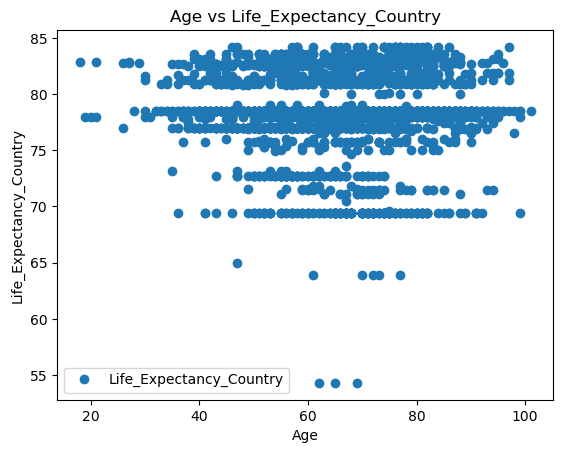

In [135]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'Age', y='Life_Expectancy_Country', style='o')  
plt.title('Age vs Life_Expectancy_Country')  
plt.xlabel('Age')  
plt.ylabel('Life_Expectancy_Country')  
plt.show()

In [136]:
# Reshape again.

X_2 = df_test['Age'].values.reshape(-1,1)
y_2 = df_test['Life_Expectancy_Country'].values.reshape(-1,1)

In [137]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [138]:
# Run and fit the regression.

regression = LinearRegression() 
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [139]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [140]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [141]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)
   

Slope: [[0.00800707]]
Mean squared error:  13.236016732924321
R2 score:  -0.001145219271088349


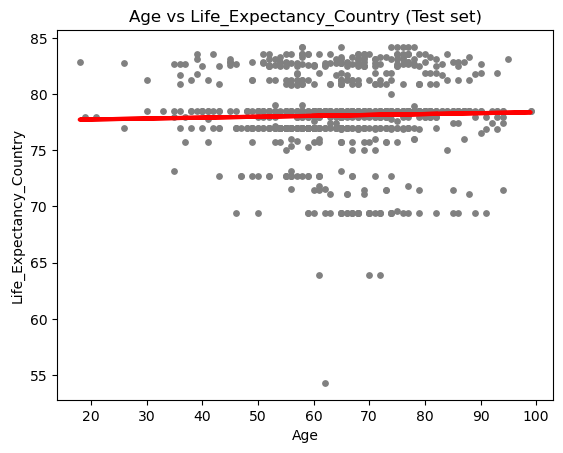

In [142]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Age vs Life_Expectancy_Country (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Life_Expectancy_Country')
plot_test.show()

In [143]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,69.4,78.243950
1,69.4,78.163879
2,77.0,77.875625
3,80.9,78.091816
4,82.5,77.907653
5,77.0,78.067794
6,81.9,78.107830
7,77.0,78.027759
8,78.5,78.107830
9,77.0,78.211922


as in test & training sets this regression line i think the variables having positive to 0 coefficient that is X and y remains same.and i can say this regression having accuracy to no accuracy as many data points are away from the line even it connects some of them abd the r2 values closer to 0 indicate a poor fit.

i also performed the regression analysis with another variable Finalworth and it also results that the 0 coffiecient as X raises y remains same r2 values closes the 0 indicates poorfit.